In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output

/kaggle/input/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np 
import pandas as pd 
raw_data = pd.read_csv("../input/WA_Fn-UseC_-Telco-Customer-Churn.csv")
raw_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data wrangling

In [3]:
#mapping senior citizen 1 to yes and 0 to no for visulization purposes and check info to identify data types
raw_data['SeniorCitizen']=raw_data['SeniorCitizen'].map({1:'Yes', 0:'No'})
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(1), ob

In [4]:
#Seems No null values but some elements in TotalCharges columns are spaces (''), those do not not showup as nulls 
raw_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# change '' to NaN
raw_data_with_nan  = raw_data.replace(' ', np.nan)
# now we have 11 null elements
raw_data_with_nan.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
#mising values (null) percentage is small(0.15%). We can drop all those rows
print ("Missing Values Percentage: {}%".format(11/raw_data_with_nan.shape[0]*100))
data_no_mv = raw_data_with_nan.dropna(axis=0)
#change data type of TotalCharges, object to float for further analysis 
data_no_mv['TotalCharges'] = data_no_mv['TotalCharges'].astype(float)

#customer id does not effect on analysis. It will drop from the dataset
data_no_mv_no_id = data_no_mv.drop(['customerID'],axis=1)

Missing Values Percentage: 0.1561834445548772%


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


## Data Visualizations

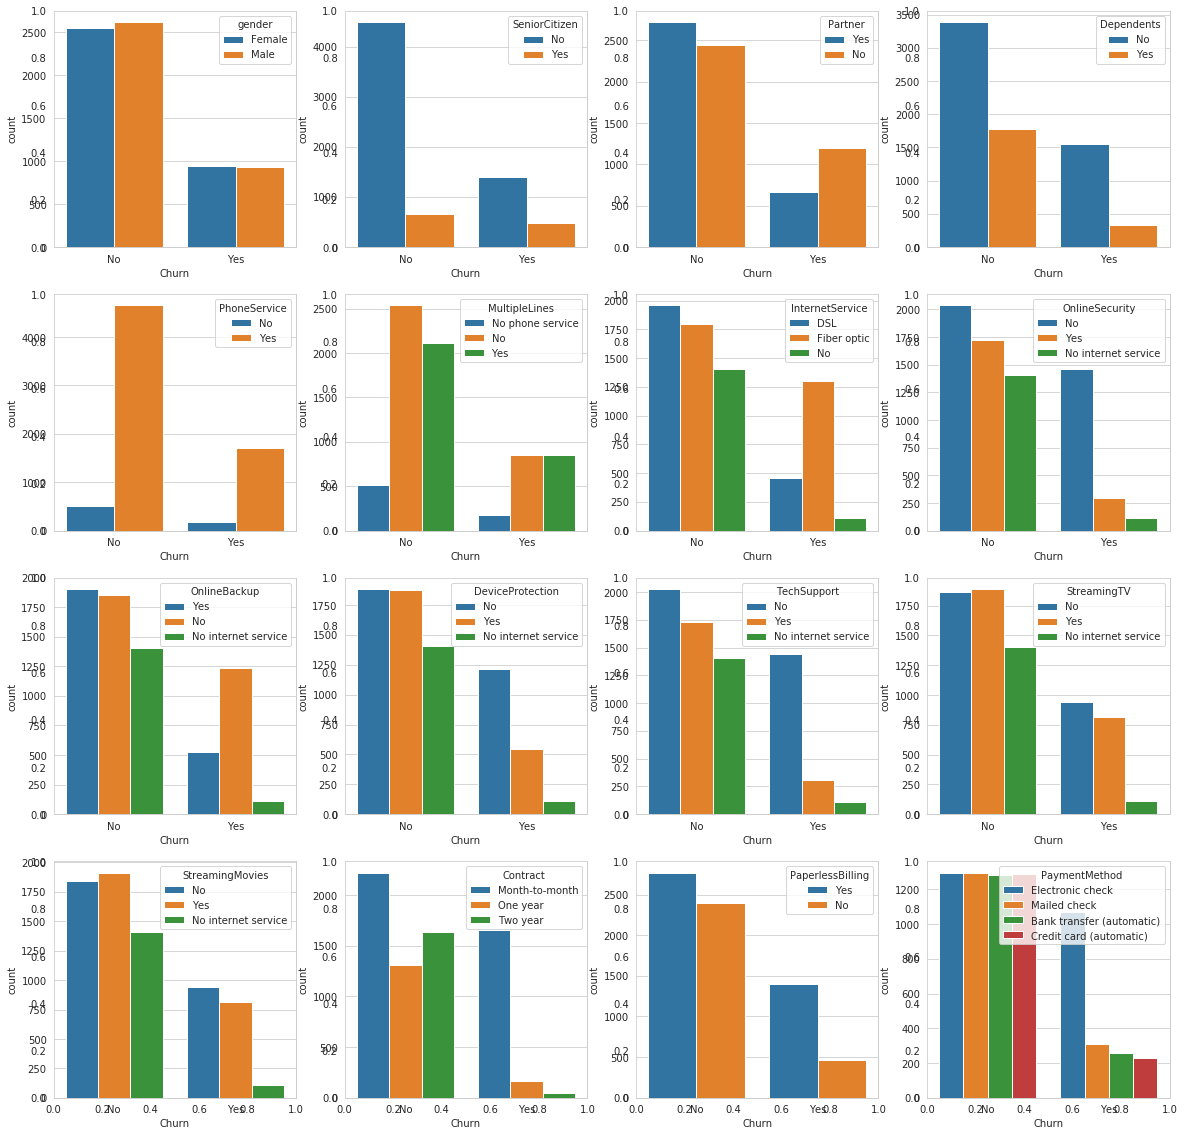

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
#collect all columns with datatype 'Object'
object_cols = list(data_no_mv_no_id.select_dtypes(include=['object']).columns)
#remove "Churn" column
object_cols.remove('Churn')
fig, axes = plt.subplots(4, 4, figsize=(20, 20), sharex=True)
i=0
for colname in object_cols:
  i=i+1
  ax1 = fig.add_subplot(4,4,i)
  sns.countplot(x='Churn', hue=colname, data=data_no_mv_no_id)
plt.show()

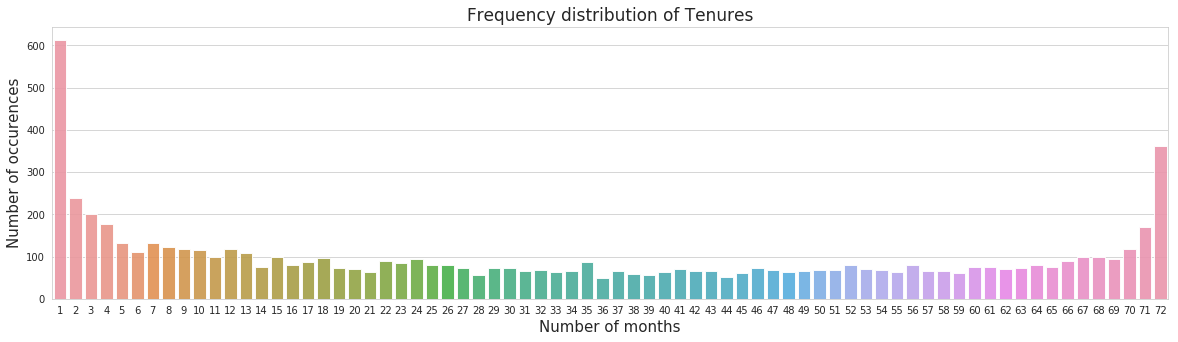

In [8]:
plt.figure(figsize=(20,5))
tenure_count = data_no_mv_no_id['tenure'].value_counts()
sns.barplot(tenure_count.index, tenure_count.values, alpha=0.9)
plt.title('Frequency distribution of Tenures', fontsize='17')
plt.xlabel('Number of months', fontsize='15')
plt.ylabel('Number of occurences',fontsize='15')
plt.show()

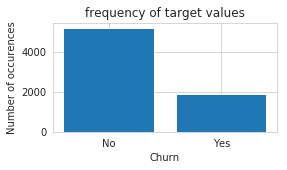

In [9]:
churn_count = data_no_mv_no_id['Churn'].value_counts()
plt.figure(figsize=(4,2))
plt.bar(churn_count.index,churn_count.values)
plt.xlabel('Churn')
plt.ylabel('Number of occurences')
plt.title('frequency of target values')
plt.show()

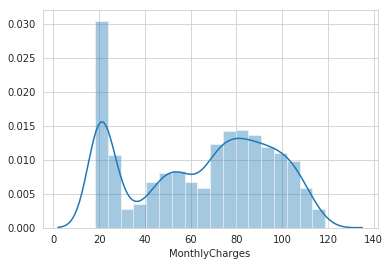

In [10]:
sns.distplot(data_no_mv_no_id['MonthlyCharges'])
plt.show()

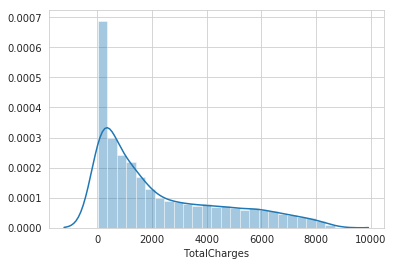

In [11]:
sns.distplot(data_no_mv_no_id['TotalCharges'])
plt.show()

## Data Preprocessing

In [12]:
# change categorical variables to numerical variables (one-hot). Drop first column for each 
# category to avoid extra correlinearity.
data_pre_processed = pd.get_dummies(data_no_mv_no_id,drop_first=True)
#separate input and targets
inputs = data_pre_processed.drop('Churn_Yes', axis=1)
targets = data_pre_processed['Churn_Yes']

In [13]:
# Import the scaling module to scale data
from sklearn.preprocessing import StandardScaler
# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)
# scale input data
inputs_scaled = scaler.transform(inputs)
# Import the module for the split
from sklearn.model_selection import train_test_split
# Split the variables with an 80-20 split and some random state 
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=1)

## Logistic Regression Model

In [14]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
#fit data to logistic model
log_model.fit(x_train,y_train)
# get prediction on train data itself to measure the performance of the model 
y_hat = log_model.predict(x_train)
#import confusion matrix
from sklearn.metrics import confusion_matrix
#create confusion matrix on train data
display(confusion_matrix(y_hat,y_train))
#import accurracy score 
from sklearn.metrics import accuracy_score
#compute accuray score of model on training data
display(accuracy_score(y_hat,y_train))

array([[3697,  662],
       [ 425,  841]])

0.8067555555555556

In [15]:
#prediction on test data 
predictions = log_model.predict(x_test)
display(confusion_matrix(predictions,y_test))
logistic_acc = accuracy_score(predictions,y_test)
display(logistic_acc)

array([[926, 171],
       [115, 195]])

0.7967306325515281

## Decision Tree Regression Model

In [16]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_model = DecisionTreeRegressor(random_state=1)
#fit data to the decision tree model
dec_tree_model.fit(x_train,y_train)
#make a prediction of train data itself
dec_tree_hat = dec_tree_model.predict(x_train)
#confusion matrix
display(confusion_matrix(dec_tree_hat.round(),y_train))
#accuray score
display(accuracy_score(y_train,dec_tree_hat.round()))

array([[4122,   13],
       [   0, 1490]])

0.9976888888888888

In [17]:
#predictions on test data
dec_tree_predictions = dec_tree_model.predict(x_test)
#confusion matrix
display(confusion_matrix(dec_tree_predictions.round(),y_test))
#accuracy score
display(accuracy_score(y_test,dec_tree_predictions.round()))

array([[824, 173],
       [217, 193]])

0.7228144989339019

## Random Forest Model

In [18]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=1)
#fit data to random forest model
rf_model.fit(x_train,y_train)
#make predictions of train data itself
rf_hat = rf_model.predict(x_train)
#accuracy score
display(accuracy_score(rf_hat.round(),y_train))
#confusion matrix
display(confusion_matrix(rf_hat.round(),y_train))

0.9783111111111111

array([[4103,  103],
       [  19, 1400]])

In [19]:
#predictions on test data
rf_predictions = rf_model.predict(x_test)
#confusion matrix
display(confusion_matrix(rf_predictions.round(),y_test))
#accuracy score
display(accuracy_score(rf_predictions.round(),y_test))

array([[931, 195],
       [110, 171]])

0.783226723525231